/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean Absolute Error: 75.13877164729527
Root Mean Squared Error: 96.74628727012394
R-Squared: 0.9638472153516259


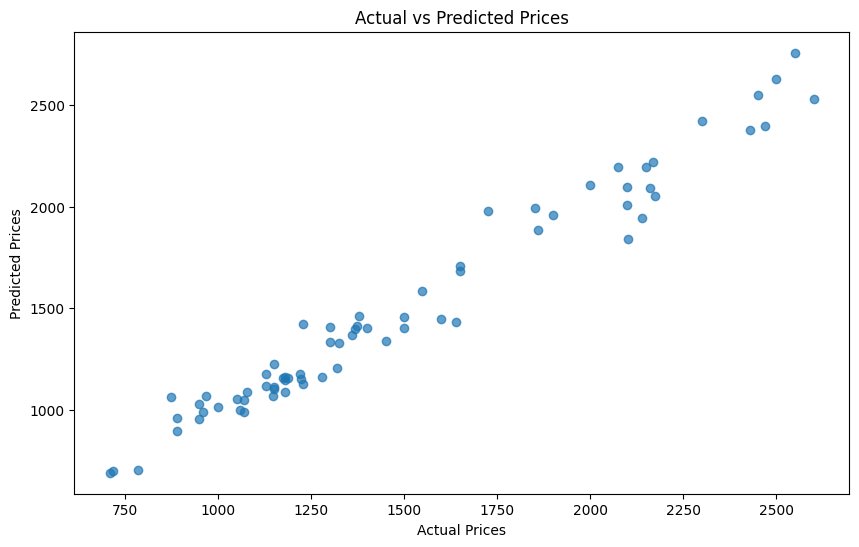

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the data
data = pd.read_excel('OnionMarketData.xlsx')

# Preprocessing
# Convert 'date_arrival' to datetime and extract year, month, day
data['date_arrival'] = pd.to_datetime(data['date_arrival'])
data['year'] = data['date_arrival'].dt.year
data['month'] = data['date_arrival'].dt.month
data['day'] = data['date_arrival'].dt.day

# Encode categorical variables
categorical_columns = ['state_name', 'district_name', 'market_center_name', 'Variety', 'group_name']
label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Splitting the dataset
features = data.drop(['MODAL', 'date_arrival'], axis=1)
target = data['MODAL']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Training the Neural Network Regressor
nn_regressor = MLPRegressor(random_state=42, max_iter=500)
nn_regressor.fit(X_train, y_train)

# Predictions and evaluation
predictions = nn_regressor.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

# Output the evaluation metrics
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-Squared:", r2)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()


Best parameters found:
 {'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.1}
0.929 (+/-0.047) for {'hidden_layer_sizes': (50,), 'learning_rate_init': 0.001}
0.938 (+/-0.023) for {'hidden_layer_sizes': (50,), 'learning_rate_init': 0.01}
0.919 (+/-0.071) for {'hidden_layer_sizes': (50,), 'learning_rate_init': 0.1}
0.933 (+/-0.033) for {'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001}
0.940 (+/-0.022) for {'hidden_layer_sizes': (100,), 'learning_rate_init': 0.01}
0.926 (+/-0.054) for {'hidden_layer_sizes': (100,), 'learning_rate_init': 0.1}
0.486 (+/-0.109) for {'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.001}
0.905 (+/-0.118) for {'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.01}
0.947 (+/-0.025) for {'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.1}
0.922 (+/-0.071) for {'hidden_layer_sizes': (100, 50), 'learning_rate_init': 0.001}
0.910 (+/-0.075) for {'hidden_layer_sizes': (100, 50), 'learning_rate_init': 0.01}
0.046 (+/-2.329) for {'hid

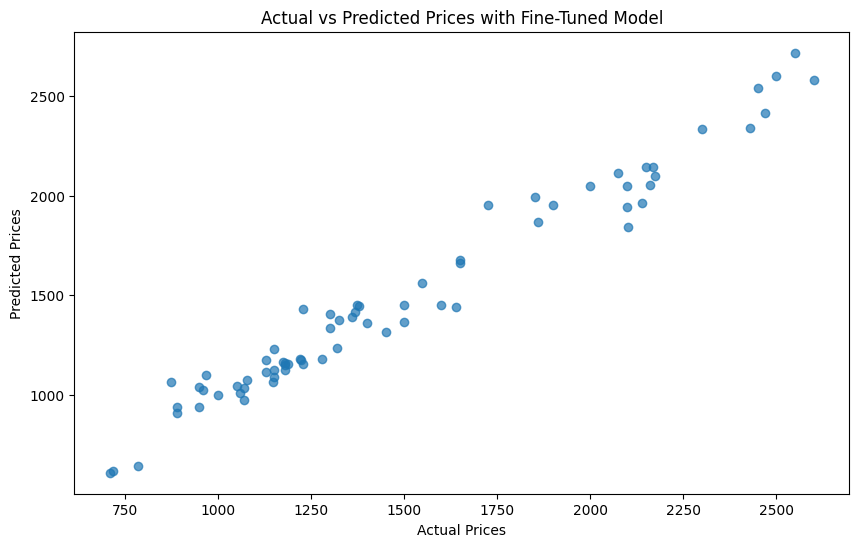

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a set of parameters to test
parameter_space = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'learning_rate_init': [0.001, 0.01, 0.1],
}

# Create a GridSearchCV object with the MLPRegressor
nn_regressor = MLPRegressor(max_iter=500, random_state=42)
clf = GridSearchCV(nn_regressor, parameter_space, n_jobs=-1, cv=3)

# Fit the model on training data
clf.fit(X_train, y_train)

# Best parameter set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

# Predictions and evaluation with the best model
best_nn = clf.best_estimator_
predictions = best_nn.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

# Output the evaluation metrics for the best model
print("\nFine-Tuned Model Evaluation Metrics:")
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-Squared:", r2)

# Plotting the results for the best model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices with Fine-Tuned Model')
plt.show()
